# ROC and AUC
Remember what is **confusion matrix**
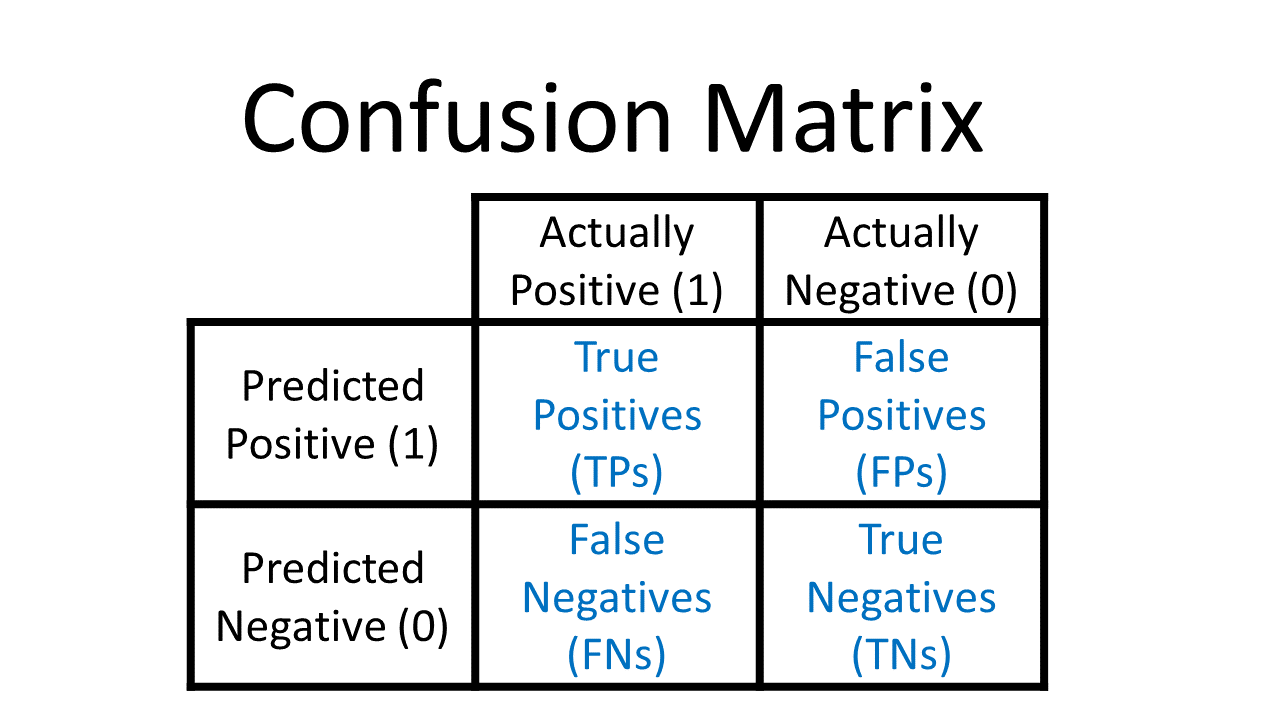

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return np.array([1 / (1 + np.exp(-i)) for i in x])

x = np.arange(-7, 7, 0.1)

cls_1 = [1, -0.1, -1.5, -2] 
cls_2 = [-0.5, 1.5, 2, 2.5]

In [2]:
def plot_sigmoid(threshold):
    plt.figure(figsize=(8, 5))
    plt.plot(x, sigmoid(x))  # sigmoid curve
    plt.axhline(y=threshold, label='threshold', color='black')
    for el_1, el_2 in zip(cls_1, cls_2):
        plt.axvline(x=el_1, ymax=sigmoid([el_1])[0], color='green')  
        plt.axvline(x=el_2, ymax=sigmoid([el_2])[0], color='red')

    plt.legend()
    plt.show()

Assume we have dataset with 8 elements, each element represents a number (any number from -3 to 3) and a class (1 or 2), we need to separate these elements by class with threshold on sigmoid function.  

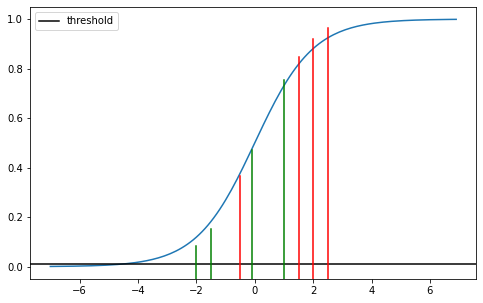

TP: 4  FP: 4
FN: 0  TN: 0


In [3]:
threshold = 0.01  # play with this number to get different outcomes
plot_sigmoid(threshold)

sig_1 = sigmoid(cls_1)
sig_2 = sigmoid(cls_2)

tp = sum(sig_2 > threshold)  # true positives     
fp = sum(sig_1 > threshold)  # false positives
fn = sum(sig_2 < threshold)  # false negatives
tn = sum(sig_1 < threshold)  # true negatives

print('TP:', tp, ' FP:', fp)
print('FN:', fn, ' TN:', tn)

And the question is - **How to find best threshold?**  
Here comes the **Receiver Operator Characteristic (ROC)** 

TP: 4  FP: 4
FN: 0  TN: 0
Coords: 1.0 1.0
TP: 4  FP: 3
FN: 0  TN: 1
Coords: 0.75 1.0
TP: 4  FP: 2
FN: 0  TN: 2
Coords: 0.5 1.0
TP: 3  FP: 2
FN: 1  TN: 2
Coords: 0.5 0.75
TP: 3  FP: 1
FN: 1  TN: 3
Coords: 0.25 0.75
TP: 3  FP: 0
FN: 1  TN: 4
Coords: 0.0 0.75
TP: 2  FP: 0
FN: 2  TN: 4
Coords: 0.0 0.5
TP: 1  FP: 0
FN: 3  TN: 4
Coords: 0.0 0.25


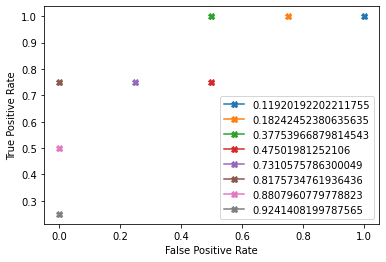

In [4]:
clss = cls_1 + cls_2
thresholds = np.sort(sigmoid(clss)) - 0.000001  # set thresholds right before the actual values

sig_1 = sigmoid(cls_1)
sig_2 = sigmoid(cls_2)

for threshold in thresholds:
    # Calculate confusion matrix
    tp = sum(sig_2 > threshold)      
    fp = sum(sig_1 > threshold)  
    fn = sum(sig_2 < threshold)
    tn = sum(sig_1 < threshold) 
    
    # Print confusion matrix
    print('TP:', tp, ' FP:', fp)
    print('FN:', fn, ' TN:', tn)
    
    x = fp / (fp + tn)  # false positive rate
    y = tp / (tp + fn)  # true positive rate
    print('Coords:', x, y)
    
    plt.plot(x, y, marker='X', label=str(threshold))
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The **ROC** graph summarizes all of the confusion matrices that each threshold produced.  
The higher true positive rate the better, the lower the false positive rate the better. So in this case I will prefer to pick 0.8176 (depends on your tasks).

**Area Under Curve (AUC)** needed to compare one ROC curve to another, if AUC for the first ROC curve is greater than the AUC for the second ROC curve, suggesting that the first curve is better. Very simple.